In [3]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Построим график плотности для случайного вектора $\xi = (\xi_{1}, \xi_{2}) \sim N(a, \Sigma),  a = (0,0),   \Sigma = \begin{pmatrix} 10 & 8 \\ 8 & 10\end{pmatrix}.$

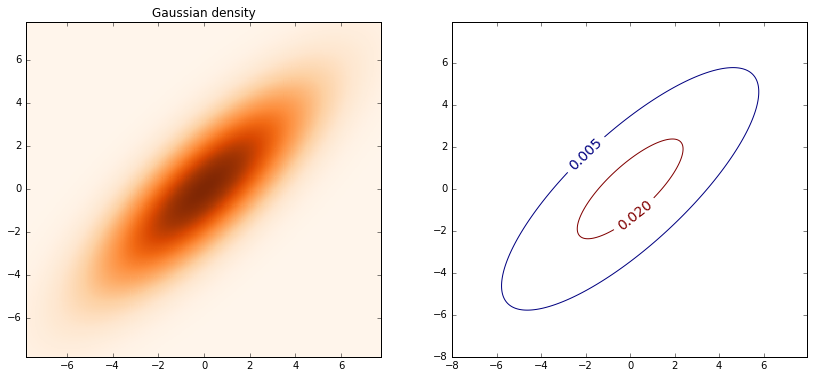

In [4]:
grid = np.mgrid[-8:8:0.05, -8:8:0.05]
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=[0, 0], cov=[[10, 8], [8, 10]])
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[0].shape[1])])

plt.figure(figsize=(14, 6))

subplot(1, 2, 1)
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.xlim((np.min(grid[0]) + 0.2, np.max(grid[0]) - 0.2))
plt.ylim((np.min(grid[1]) + 0.2, np.max(grid[1]) - 0.2))
plt.title('Gaussian density')

subplot(1, 2, 2)
CS = plt.contour(grid[0], grid[1], density, [0.005, 0.02])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
plt.xlim((np.min(grid[0]), np.max(grid[0])))
plt.ylim((np.min(grid[1]), np.max(grid[1])))
    
plt.show()

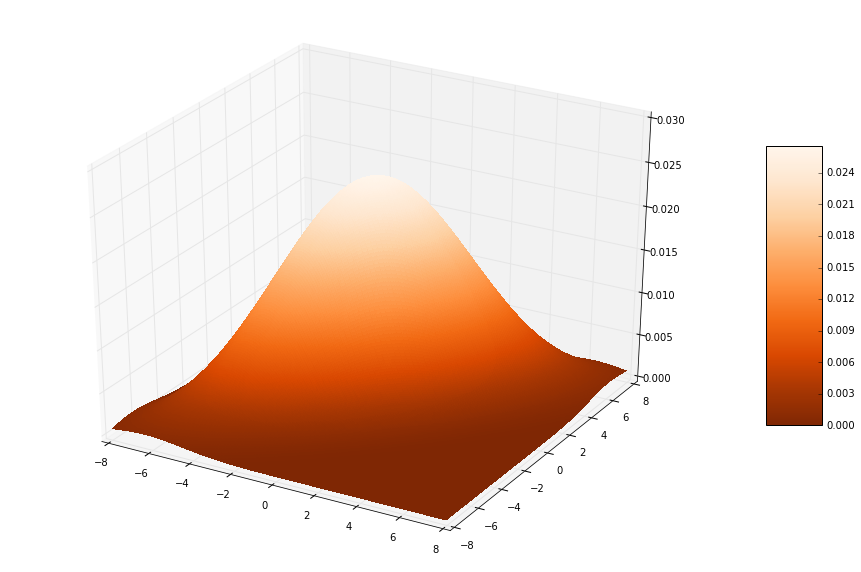

In [5]:
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid[0], grid[1], density, rstride=1, cstride=1, cmap='Oranges_r',
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.03)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Теперь для каждого $y \in \{-3, 0, 1 ,5\}$  построим график $f_{\xi_1|\xi_2}(x|y)$

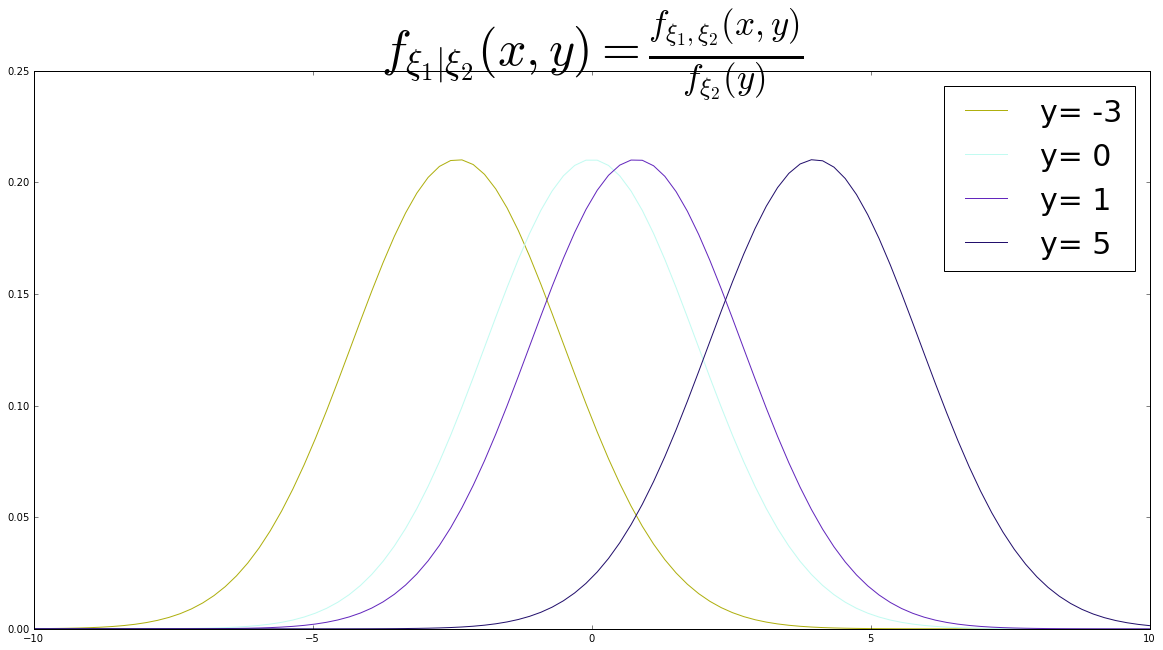

In [41]:
grid = np.linspace(-10, 10, 100)
plt.figure(figsize=(20, 10))
plt.title(r'$f_{\xi_1|\xi_2}(x, y) = \frac{f_{\xi_1, \xi_2}(x, y)}{f_{\xi_2}(y)}$', fontsize = 50)

for y in [-3, 0, 1, 5]:
    multiv_norm = sps.multivariate_normal.pdf(np.array([grid, np.linspace(y, y, 100)]).T, 
                                              mean=[0, 0], cov=[[10, 8], [8, 10]]) 
    y_norm = sps.norm.pdf(np.linspace(y, y, 100), loc=0, scale=math.sqrt(10))
    plt.plot(grid, multiv_norm / y_norm, color=random.rand(3,1), label='y= ' + str(y))

plt.legend(fontsize = 30)
plt.show()

## Графики для $f_{\xi_1|\xi_2}(x, y) = \frac{f_{\xi_1, \xi_2}(x, y)}{f_{\xi_2}(y)}$, где $ y \in \{-3, 0, 1, 5\}$

# ...

# Теперь график $E(\xi_1 | \xi_2 = y)$

# Подберем  $\alpha, \beta : \alpha\xi_1 + \beta\xi_2 {\perp\!\!\!\perp} \xi_2$
# $Cov(5\xi_1-4\xi_2, \xi_2)=5Cov(\xi_1, \xi_2)-4Cov(\xi_2,\xi_2)=0$
# $E(\xi_1 | \xi_2) = \frac{1}{5}E(5\xi_1-4\xi_2 + 4\xi_2 | \xi_2) = \frac{4}{5}\xi_2$

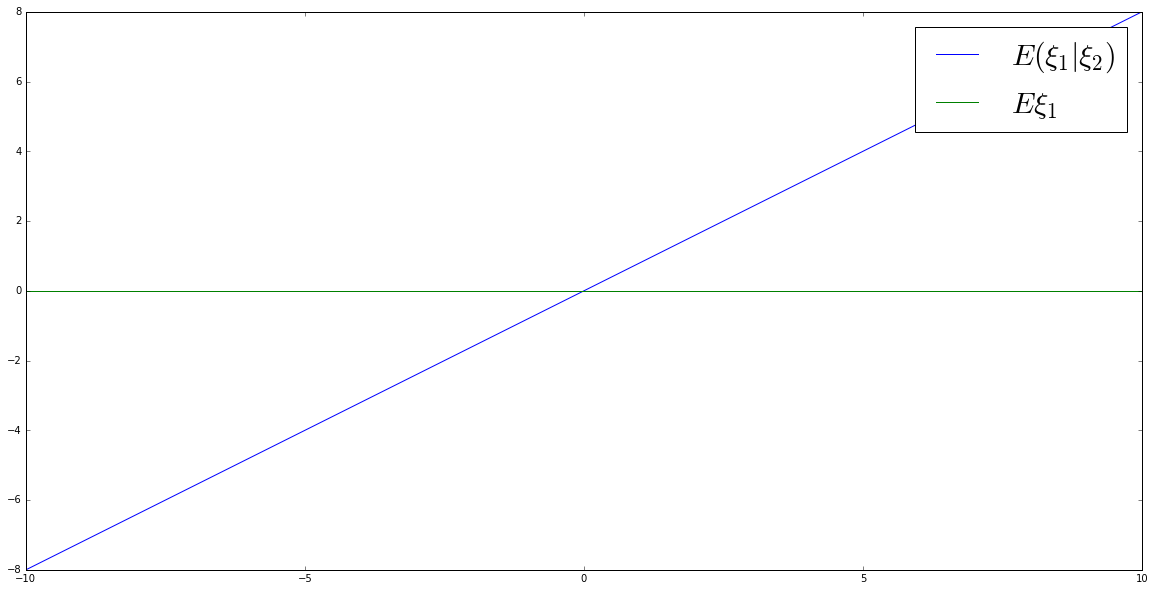

In [42]:
plt.figure(figsize=(20, 10))
x = np.linspace(-10,10,1000)
plt.plot(x, 4*x/5, label = r'$E(\xi_1 | \xi_2)$')
plt.plot(x, np.zeros(1000), label = r'$E\xi_1$')
plt.legend(fontsize = 30)
plt.show()